In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
#Connect to google drive
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
#Unzip in data
!unzip /content/drive/MyDrive/MLHC/Project1/heart_failure.zip < /dev/null

Archive:  /content/drive/MyDrive/MLHC/Project1/heart_failure.zip
replace heart_failure/test_split.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


In [130]:
test_split = pd.read_csv("heart_failure/test_split.csv")
train_val_split = pd.read_csv("heart_failure/train_val_split.csv")

In [131]:
print(test_split.shape)
display(test_split)
print(train_val_split.shape)
display(train_val_split)

(184, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,60,M,ASY,145,282,0,LVH,142,Y,2.8,Flat,1
1,57,M,ASY,160,0,1,Normal,98,Y,2.0,Flat,1
2,62,F,ASY,150,244,0,Normal,154,Y,1.4,Flat,1
3,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
4,57,M,ASY,128,0,1,ST,148,Y,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
179,57,M,ASY,140,192,0,Normal,148,N,0.4,Flat,0
180,52,M,ATA,120,284,0,Normal,118,N,0.0,Up,0
181,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0
182,48,M,ASY,130,256,1,LVH,150,Y,0.0,Up,1


(734, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
2,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
3,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
4,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
729,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
730,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
731,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
732,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1


In [132]:
print(train_val_split.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [133]:
#Turned all categorical columns into ordinal(gave each category a value) -> Male(1), Female(0) etc
for i in train_val_split.columns:
      if train_val_split[i].dtype == 'object' or train_val_split[i].dtype == 'bool': #turn object/string into categorical
            train_val_split[i] = pd.Categorical(train_val_split[i])
            train_val_split[i] = train_val_split[i].cat.codes
display(train_val_split)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,37,1,1,130,283,0,2,98,0,0.0,2,0
2,48,0,0,138,214,0,1,108,1,1.5,1,1
3,54,1,2,150,195,0,1,122,0,0.0,2,0
4,39,1,2,120,339,0,1,170,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
729,41,1,1,120,157,0,1,182,0,0.0,2,0
730,57,0,0,140,241,0,1,123,1,0.2,1,1
731,45,1,3,110,264,0,1,132,0,1.2,1,1
732,68,1,0,144,193,1,1,141,0,3.4,1,1


In [101]:
display(train_val_split.describe())
display(train_val_split.isna().sum()) #seemingly no missing data, but actually the missing data is just 0 or sth
'''
Resting BP: min is 0 max is 200 (strange).
Cholesterol: min is 0, max is 529 (strange).
FastingBS: min is 0, max is 1
MaxHR: min is 60, max is 195 (seems normal)
Oldpeak: min is -2, max is 6.2 (strange)
HeartDisease: 
'''
print(type(train_val_split))

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,734.000000,734.000000,734.000000,734.00000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,53.523161,0.780654,0.801090,132.06267,197.588556,0.232970,0.994550,136.167575,0.401907,0.873978,1.373297,0.542234
std,9.421110,0.414086,0.943824,18.61849,108.979439,0.423012,0.633294,25.334552,0.490618,1.082222,0.604346,0.498553
min,29.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.000000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.00000,172.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.00000,222.000000,0.000000,1.000000,138.000000,0.000000,0.500000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.00000,267.000000,0.000000,1.000000,155.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.00000,529.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,1.000000


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<class 'pandas.core.frame.DataFrame'>


#Pairwise correlation matrix

##Q1: Exploratory Data Analysis (5 Pts)
Get familiar with the dataset by exploring the different features, their distribution, and the labels. Check for common pitfalls like missing or nonsensical data, unusual feature distribution, outliers, or class imbalance, and describe how to handle them. After having familiarized yourself with the data, explain how you preprocess the dataset for the remaining tasks of part 1. Interpretability
     
and explainability aim at gaining more insights about the data than just optimizing predictive performance. A first simple step is to have a look at the (linear) dependencies of the variables. Visualize the pairwise correlation matrix and describe which features seem to be important for predicting the label.

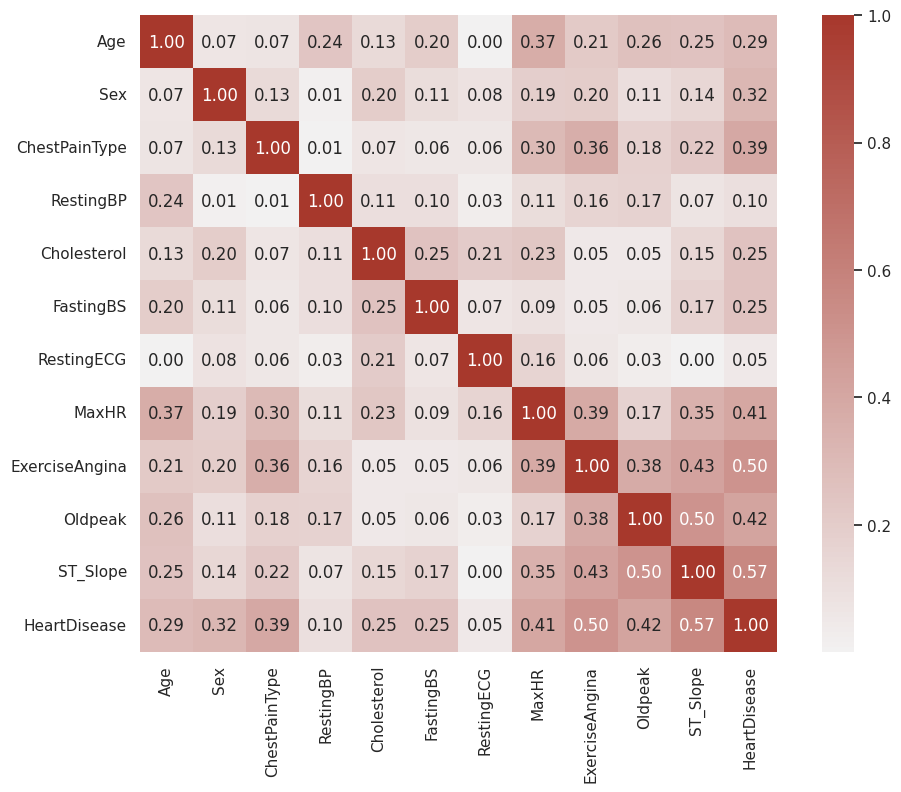

<Figure size 4000x2000 with 0 Axes>

In [102]:
corr_matrix = train_val_split.corr().abs()
# Create a custom diverging palette: https://towardsdatascience.com/how-to-use-pairwise-correlation-for-robust-feature-selection-20a60ef7d10
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
sns.heatmap(corr_matrix, annot=True, center=0, 
                fmt='.2f', square=True, cmap=cmap)

#Pairwise correlation matrix
#MaxHr neg correlation to Heart disease! oldpeak correlates alot with HeartDisease
plt.figure(figsize=(40,20))
plt.show()

In [136]:
y = train_val_split["HeartDisease"] #.to_numpy()
X = train_val_split.drop(columns=["HeartDisease"])
#X = data.to_numpy()
#display(X)
#display(y)

#TrainTestSplit

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

log = LogisticRegression(penalty='l1', solver='liblinear')
model = log.fit(X_train, y_train)
y_pred = model.predict(X_test)
#print("prediction", y_pred)
#print("actual", y_test)
print("Accuracy score for Logistic Regression is ", accuracy_score(y_test, y_pred))

Accuracy score for Logistic Regression is  0.8724279835390947


#Decision Trees

Decision Tree


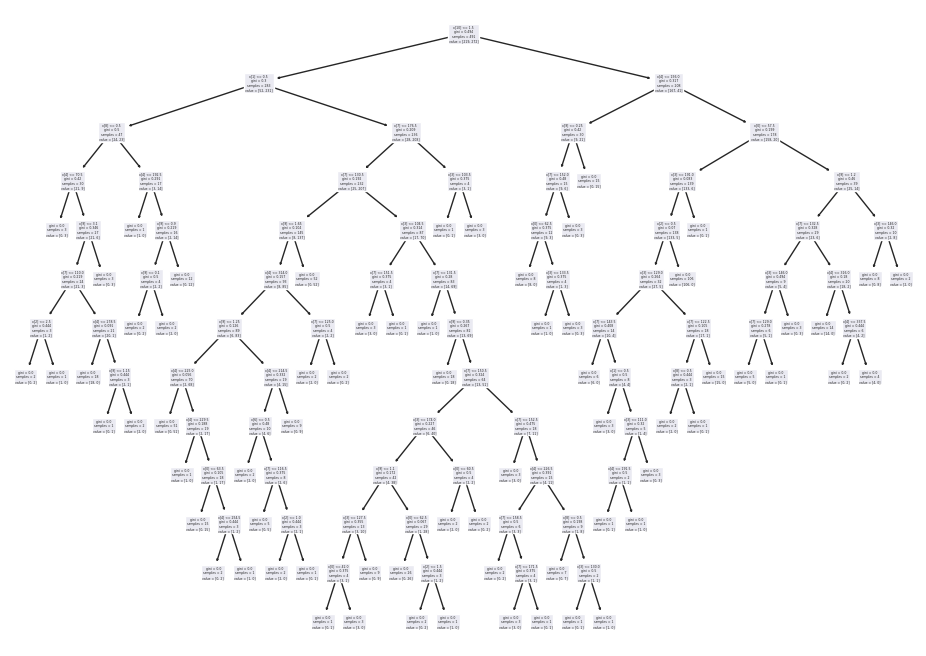

In [139]:
from sklearn import tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets 

clf = tree.DecisionTreeClassifier(criterion ="gini")
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
tree.plot_tree(clf)
print("Decision Tree")

Accuracy score for Decision Tree is  0.8353909465020576


<Axes: >

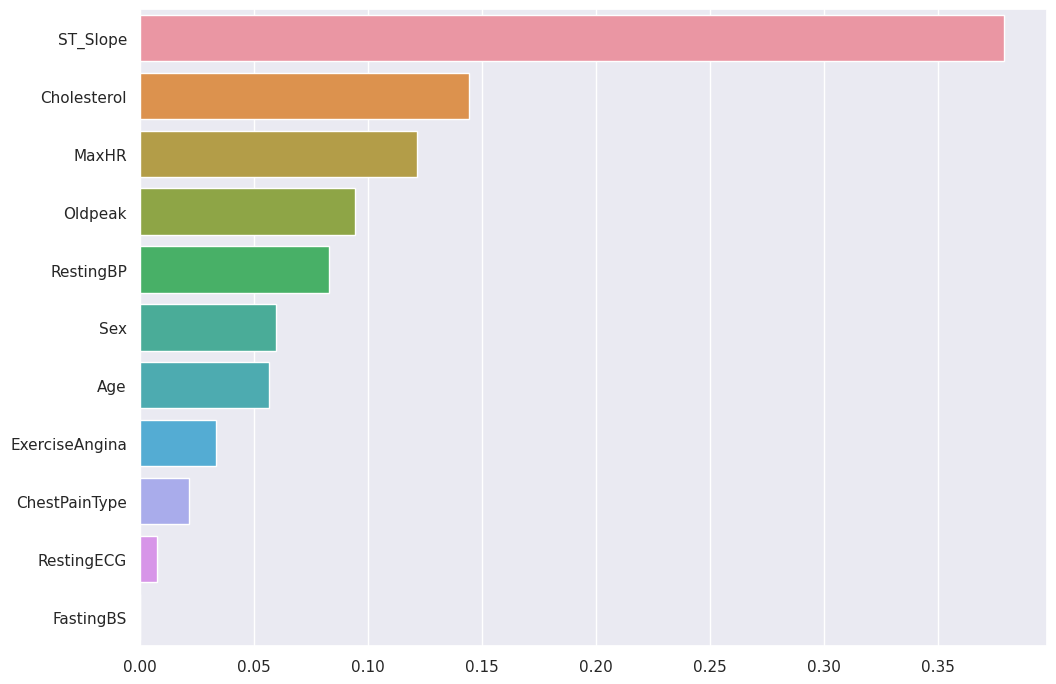

In [141]:
#print(accuracy_score(y_test, y_pred))
print("Accuracy score for Decision Tree is ", clf.score(X_test, y_test))
feature_importances = clf.feature_importances_
#print("feature importances", feature_importances)
# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = X.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(x= sorted_importances, y= sorted_feature_names)

#Q4 MLP

In [142]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
#print(clf.predict_proba(X_test[:1]))
print("Accuracy of MLP is ", clf.score(X_test, y_test))


Accuracy of MLP is  0.8600823045267489


In [143]:
#!pip install shap
import shap

X100 = shap.utils.sample(X_test, 100) # 100 instances for use as the background distribution
# compute the SHAP values for the linear model
explainer = shap.Explainer(clf.predict, X100)
shap_values = explainer(X)

Permutation explainer: 735it [01:38,  7.27it/s]


Patient  4  has values: 
Age                41.0
Sex                 1.0
ChestPainType       0.0
RestingBP         120.0
Cholesterol       336.0
FastingBS           0.0
RestingECG          1.0
MaxHR             118.0
ExerciseAngina      1.0
Oldpeak             3.0
ST_Slope            1.0
Name: 192, dtype: float64 Patient heart disease:  1


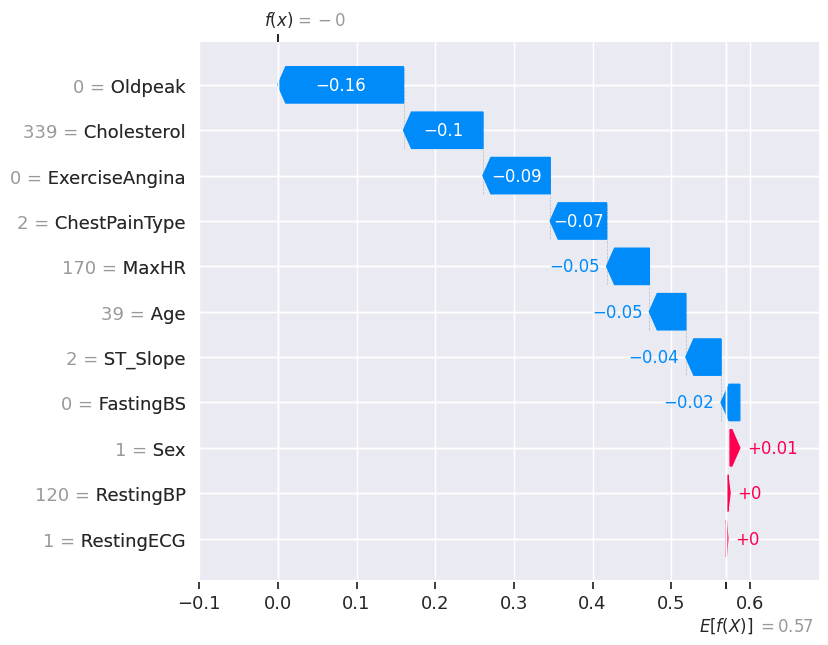

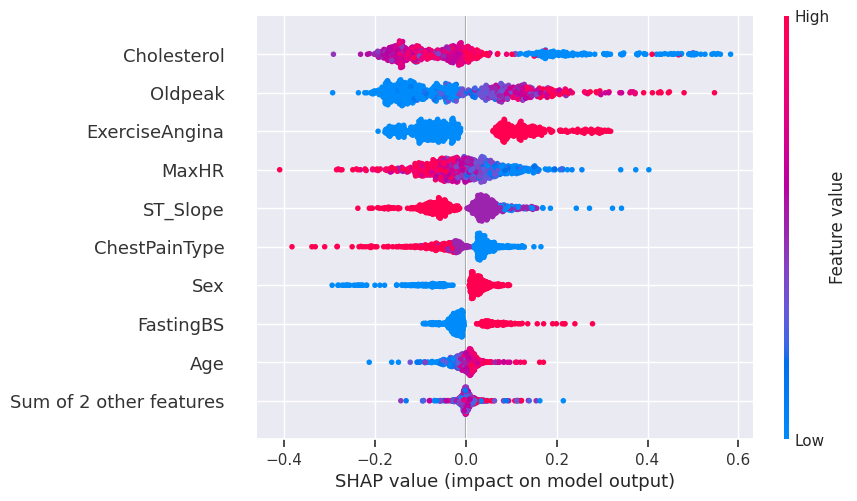

In [162]:
#print("features", shap_values.data_feature_names)
#print(shap_values)
#print(type(shap_values))
sample_ind = 4 # for which patient we should see how the input gets changed to produce the prediction 
#patients with heart disease: 2, 4
print("Patient ", sample_ind, " has values: ")
print(X_test.iloc[sample_ind], "Patient heart disease: ", y_test.iloc[sample_ind])
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)
shap.plots.beeswarm(shap_values)
#feature importance seems to change for each person

#Neural Additive Models

#Try out stuff